In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visualizaiton styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

In [16]:
train_df = pd.read_csv('../data/ds_test_training_dataset_2024.csv')
houston_df = pd.read_csv('../data/ds_test_houston_2024.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Houston data shape: {houston_df.shape}")

Training data shape: (7462, 49)
Houston data shape: (2539, 48)


In [15]:
train_df.head()

,id,state,county_name,media_market,gender,political_party,education_area,age,gender_female,gender_male,...,interests_veteranaffairs,ethnicity_afam,ethnicity_latino,ethnicity_asian,ethnicity_white,ethnicity_other,Plan Enrolled,is_enrolled,age_group,income_group
0,2b79fa61dab4f25a68e6143da260b62d,TX,midland,odessa-midland tx,F,R,03-Low Education Area,36.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,Plan Blue,True,36-45,$80-100K
1,9f1226559658a9b83e2d8f2eadd9d9d6,TX,bexar,san antonio tx,M,D,03-Low Education Area,28.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,Not Subscribed,False,26-35,$60-80K
2,ec7dda6179018d844bd101fe72c83515,TX,victoria,victoria tx,F,I,03-Low Education Area,29.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,Plan Blue,True,26-35,$60-80K
3,e2055749e26a483b6bd8fd18e4b2fec3,TX,gillespie,austin tx,M,R,02-Medium Education Area,38.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,Plan Red,True,36-45,$100-150K
4,6251d9b7f3e2788c316982cc48a49e5c,TX,bexar,san antonio tx,F,D,03-Low Education Area,21.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,Not Subscribed,False,18-25,$80-100K


In [7]:
# baseline enrollment rates

enrollment_counts = train_df['Plan Enrolled'].value_counts()
enrollment_pcts = train_df['Plan Enrolled'].value_counts(normalize=True) * 100

print("\nCounts:")
print(enrollment_counts)
print("\nPercentages:")
for plan, pct in enrollment_pcts.items():
    print(f" {plan}: {pct:.1f}%")

# Create binary enrolled flag
train_df['is_enrolled'] = train_df['Plan Enrolled'] != 'Not Subscribed'
overall_enrollment_rate = train_df['is_enrolled'].mean() * 100
print(f"\n overall enrollment rate {overall_enrollment_rate:.1f}%")


Counts:
Plan Enrolled
Not Subscribed    3764
Plan Blue         2536
Plan Red          1162
Name: count, dtype: int64

Percentages:
 Not Subscribed: 50.4%
 Plan Blue: 34.0%
 Plan Red: 15.6%

 overall enrollment rate 49.6%


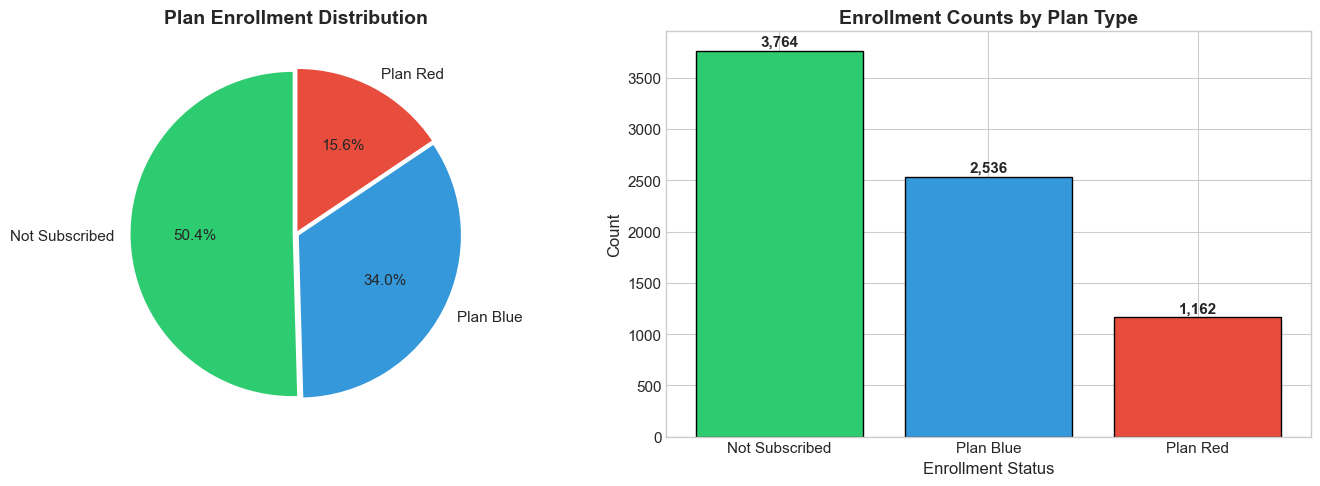

In [5]:
# Visualization: Overall Enrollment Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart for plan breakdown
colors = ['#2ecc71', '#3498db', '#e74c3c']
axes[0].pie(enrollment_counts, labels=enrollment_counts.index, autopct='%1.1f%%', 
            colors=colors, explode=(0.02, 0.02, 0.02), startangle=90)
axes[0].set_title('Plan Enrollment Distribution', fontsize=14, fontweight='bold')

# Bar chart
bars = axes[1].bar(enrollment_counts.index, enrollment_counts.values, color=colors, edgecolor='black')
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xlabel('Enrollment Status', fontsize=12)
axes[1].set_title('Enrollment Counts by Plan Type', fontsize=14, fontweight='bold')
for bar, count in zip(bars, enrollment_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                 f'{count:,}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# enrollment by demographics
# Create age bins
train_df['age_group'] = pd.cut(train_df['age'], 
                                bins=[0, 25, 35, 45, 55, 65, 100], 
                                labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Create income bins
train_df['income_group'] = pd.cut(train_df['income'], 
                                   bins=[0, 40, 60, 80, 100, 150, 500], 
                                   labels=['<$40K', '$40-60K', '$60-80K', '$80-100K', '$100-150K', '$150K+'])

/var/folders/42/cgr5vkrs77z8tvfrpwlwzpm80000gn/T/ipykernel_16925/3417474419.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = train_df.groupby(groupby_col)['is_enrolled'].agg(['mean', 'count'])
/var/folders/42/cgr5vkrs77z8tvfrpwlwzpm80000gn/T/ipykernel_16925/3417474419.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = train_df.groupby(groupby_col)['is_enrolled'].agg(['mean', 'count'])


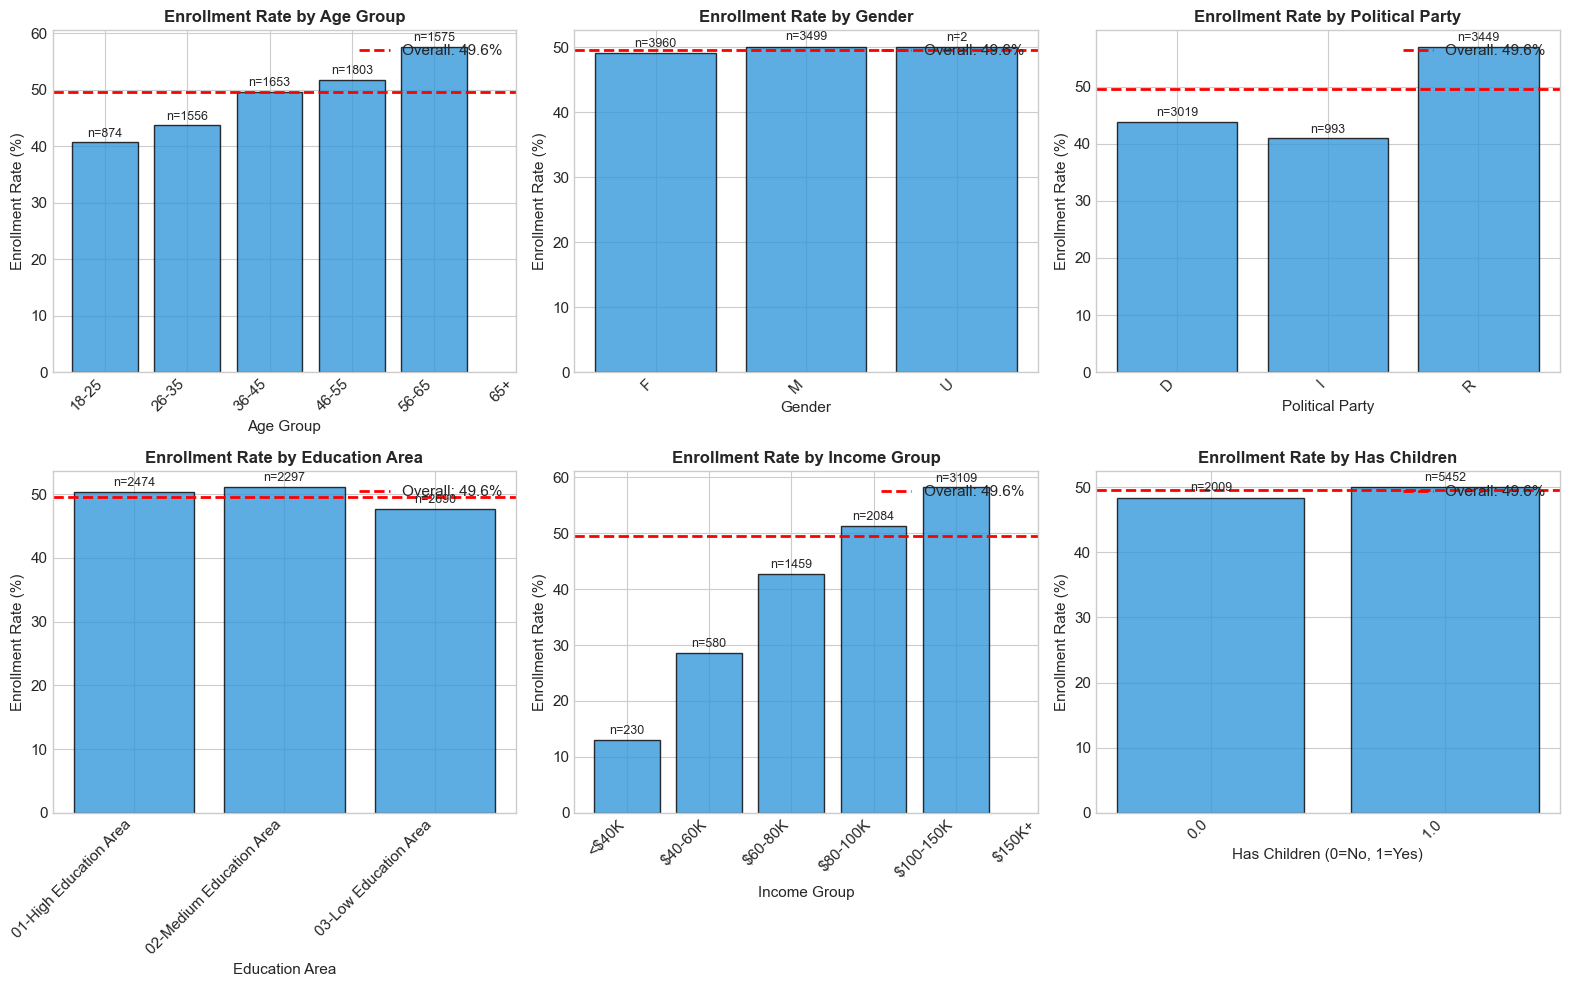

In [9]:
# Enrollment rates by key segments
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Helper function for enrollment rate bar plots
def plot_enrollment_rate(ax, groupby_col, title, xlabel):
    rates = train_df.groupby(groupby_col)['is_enrolled'].agg(['mean', 'count'])
    rates['mean'] = rates['mean'] * 100
    
    bars = ax.bar(range(len(rates)), rates['mean'], color='#3498db', edgecolor='black', alpha=0.8)
    ax.axhline(y=overall_enrollment_rate, color='red', linestyle='--', linewidth=2, label=f'Overall: {overall_enrollment_rate:.1f}%')
    ax.set_xticks(range(len(rates)))
    ax.set_xticklabels(rates.index, rotation=45, ha='right')
    ax.set_ylabel('Enrollment Rate (%)')
    ax.set_xlabel(xlabel)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(loc='upper right')
    
    # Add count labels
    for i, (bar, count) in enumerate(zip(bars, rates['count'])):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'n={count}', ha='center', fontsize=9)

# Age group
plot_enrollment_rate(axes[0, 0], 'age_group', 'Enrollment Rate by Age Group', 'Age Group')

# Gender
plot_enrollment_rate(axes[0, 1], 'gender', 'Enrollment Rate by Gender', 'Gender')

# Political Party
plot_enrollment_rate(axes[0, 2], 'political_party', 'Enrollment Rate by Political Party', 'Political Party')

# Education Area
plot_enrollment_rate(axes[1, 0], 'education_area', 'Enrollment Rate by Education Area', 'Education Area')

# Income Group
plot_enrollment_rate(axes[1, 1], 'income_group', 'Enrollment Rate by Income Group', 'Income Group')

# Has Children
plot_enrollment_rate(axes[1, 2], 'has_children', 'Enrollment Rate by Has Children', 'Has Children (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

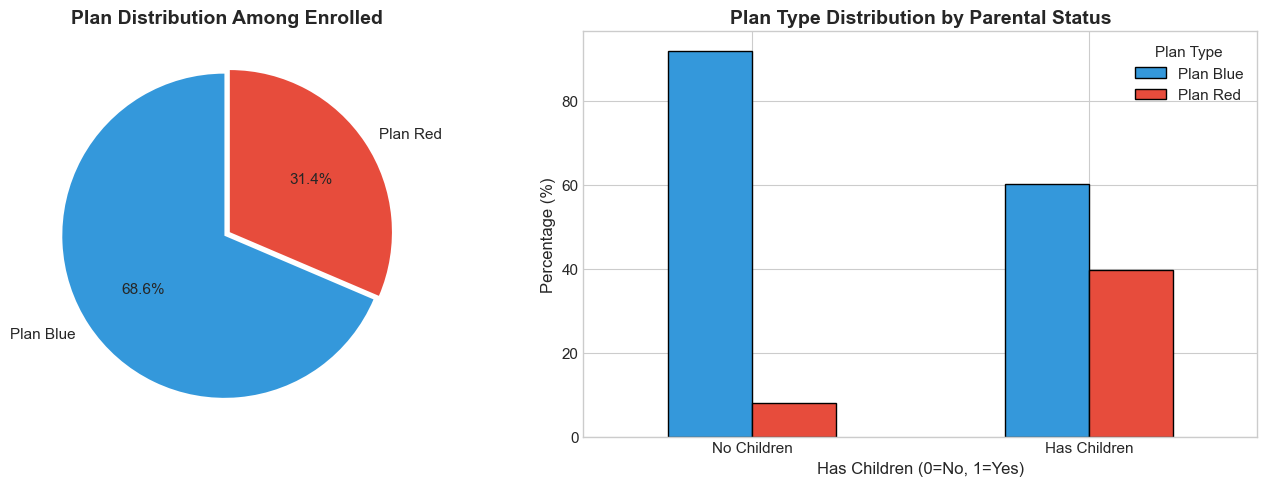


Key Insight: Plan Red (HSA + Dependent Care FSA) should be more popular among those with children.


In [10]:
# Among those enrolled, what's the split between Plan Blue and Plan Red?
enrolled_df = train_df[train_df['is_enrolled'] == True]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plan split among enrolled
plan_counts = enrolled_df['Plan Enrolled'].value_counts()
axes[0].pie(plan_counts, labels=plan_counts.index, autopct='%1.1f%%', 
            colors=['#3498db', '#e74c3c'], explode=(0.02, 0.02), startangle=90)
axes[0].set_title('Plan Distribution Among Enrolled', fontsize=14, fontweight='bold')

# Plan type by has_children (since Plan Red includes Dependent Care FSA)
plan_by_children = train_df[train_df['is_enrolled']].groupby(['has_children', 'Plan Enrolled']).size().unstack(fill_value=0)
plan_by_children_pct = plan_by_children.div(plan_by_children.sum(axis=1), axis=0) * 100

plan_by_children_pct.plot(kind='bar', ax=axes[1], color=['#3498db', '#e74c3c'], edgecolor='black')
axes[1].set_xlabel('Has Children (0=No, 1=Yes)', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_title('Plan Type Distribution by Parental Status', fontsize=14, fontweight='bold')
axes[1].legend(title='Plan Type')
axes[1].set_xticklabels(['No Children', 'Has Children'], rotation=0)

plt.tight_layout()
plt.show()

print("\nKey Insight: Plan Red (HSA + Dependent Care FSA) should be more popular among those with children.")

/var/folders/42/cgr5vkrs77z8tvfrpwlwzpm80000gn/T/ipykernel_16925/1683456078.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bbq_rates = train_df.groupby('Interest in Barbeque')['is_enrolled'].agg(['mean', 'count'])


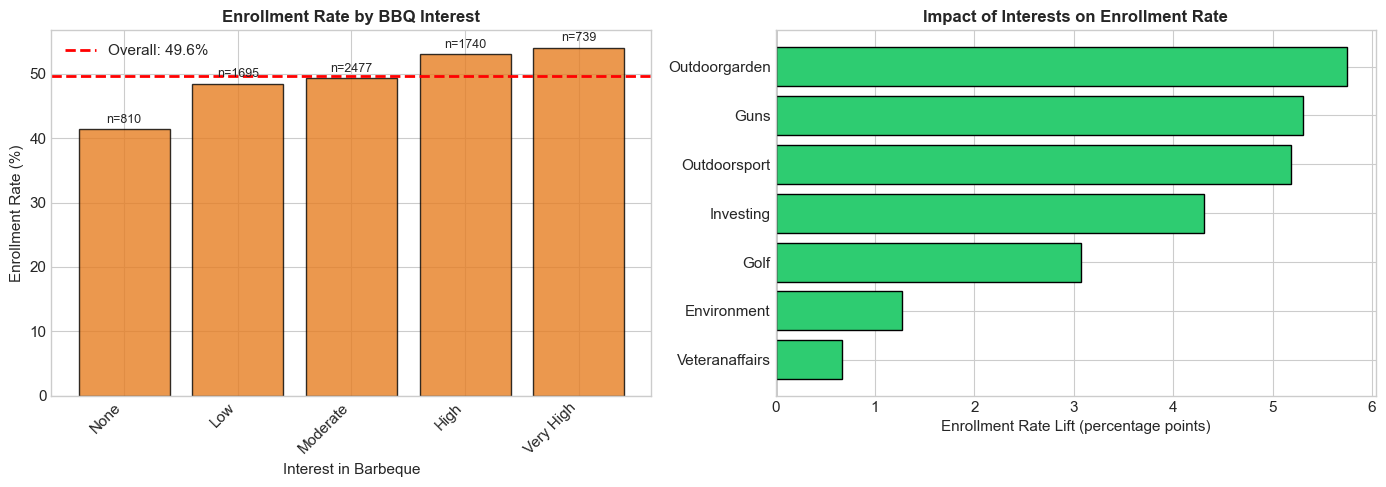

In [11]:
# interest analysis

# Interest in Barbeque
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Order the categories properly
bbq_order = ['No interest', 'Low Interest', 'Moderate Interest', 'High Interest', 'Very High Interest']
train_df['Interest in Barbeque'] = pd.Categorical(train_df['Interest in Barbeque'], categories=bbq_order, ordered=True)

# Enrollment rate by BBQ interest
bbq_rates = train_df.groupby('Interest in Barbeque')['is_enrolled'].agg(['mean', 'count'])
bbq_rates['mean'] = bbq_rates['mean'] * 100

bars = axes[0].bar(range(len(bbq_rates)), bbq_rates['mean'], color='#e67e22', edgecolor='black', alpha=0.8)
axes[0].axhline(y=overall_enrollment_rate, color='red', linestyle='--', linewidth=2, label=f'Overall: {overall_enrollment_rate:.1f}%')
axes[0].set_xticks(range(len(bbq_rates)))
axes[0].set_xticklabels(['None', 'Low', 'Moderate', 'High', 'Very High'], rotation=45, ha='right')
axes[0].set_ylabel('Enrollment Rate (%)')
axes[0].set_xlabel('Interest in Barbeque')
axes[0].set_title('Enrollment Rate by BBQ Interest', fontsize=12, fontweight='bold')
axes[0].legend()

for bar, count in zip(bars, bbq_rates['count']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'n={count}', ha='center', fontsize=9)

# Binary interests comparison
interest_cols = ['interests_environment', 'interests_outdoorgarden', 'interests_outdoorsport', 
                 'interests_guns', 'interests_golf', 'interests_investing', 'interests_veteranaffairs']

interest_rates = []
for col in interest_cols:
    rate_yes = train_df[train_df[col] == 1]['is_enrolled'].mean() * 100
    rate_no = train_df[train_df[col] == 0]['is_enrolled'].mean() * 100
    interest_rates.append({
        'Interest': col.replace('interests_', '').title(),
        'Has Interest': rate_yes,
        'No Interest': rate_no,
        'Lift': rate_yes - rate_no
    })

interest_df = pd.DataFrame(interest_rates).sort_values('Lift', ascending=True)

colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in interest_df['Lift']]
axes[1].barh(interest_df['Interest'], interest_df['Lift'], color=colors, edgecolor='black')
axes[1].axvline(x=0, color='black', linewidth=1)
axes[1].set_xlabel('Enrollment Rate Lift (percentage points)')
axes[1].set_title('Impact of Interests on Enrollment Rate', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Explanation of this ^
For each interest, outdoor garden, guns, sport, investing, golf, environment, veteran affaris, etc. I calculate the enrollment rate for people with the interest then for the people without the interest. The lift is the difference in % points between the two categories.

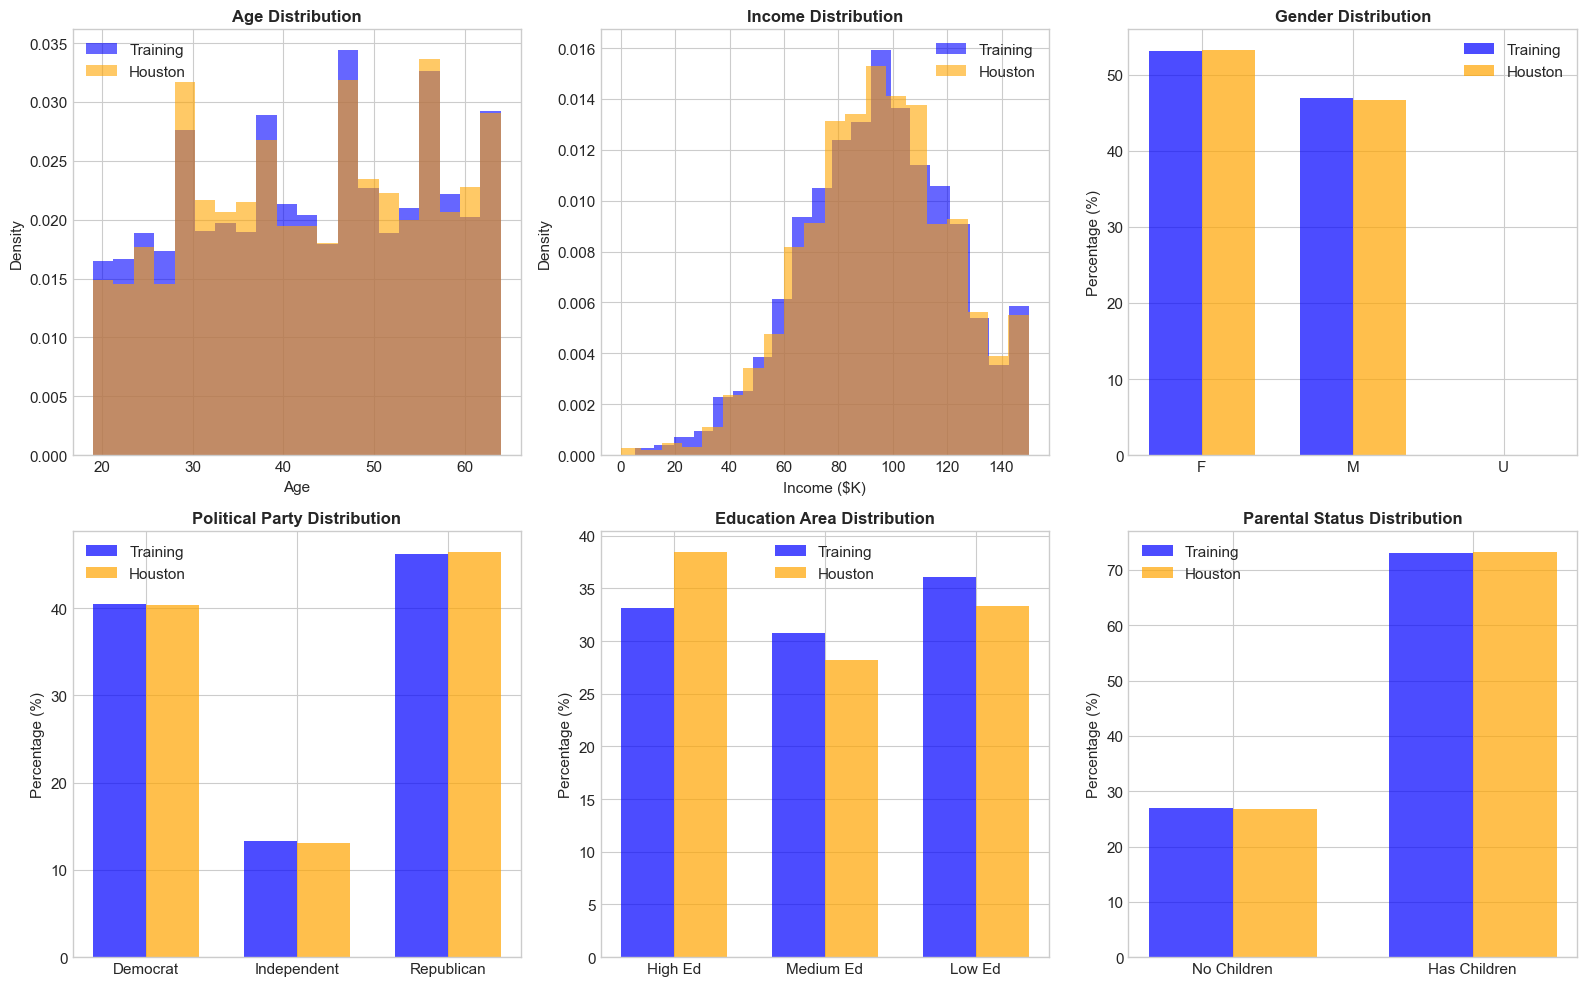

In [13]:
# Check for domain shift - are houston (test) demographics different from training data

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# age distribution
axes[0, 0].hist(train_df['age'], bins=20, alpha=0.6, label='Training', color='blue', density=True)
axes[0, 0].hist(houston_df['age'], bins=20, alpha=0.6, label='Houston', color='orange', density=True)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()

# income distribution
axes[0, 1].hist(train_df['income'], bins=20, alpha=0.6, label='Training', color='blue', density=True)
axes[0, 1].hist(houston_df['income'], bins=20, alpha=0.6, label='Houston', color='orange', density=True)
axes[0, 1].set_xlabel('Income ($K)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Income Distribution', fontsize=12, fontweight='bold')
axes[0, 1].legend()

# gender comparison
gender_train = train_df['gender'].value_counts(normalize=True) * 100
gender_houston = houston_df['gender'].value_counts(normalize=True) * 100
x = np.arange(len(gender_train))
width = 0.35
axes[0, 2].bar(x - width/2, gender_train.values, width, label='Training', color='blue', alpha=0.7)
axes[0, 2].bar(x + width/2, gender_houston.values, width, label='Houston', color='orange', alpha=0.7)
axes[0, 2].set_xticks(x)
axes[0, 2].set_xticklabels(gender_train.index)
axes[0, 2].set_ylabel('Percentage (%)')
axes[0, 2].set_title('Gender Distribution', fontsize=12, fontweight='bold')
axes[0, 2].legend()

# political party comparison
party_train = train_df['political_party'].value_counts(normalize=True) * 100
party_houston = houston_df['political_party'].value_counts(normalize=True) * 100
x = np.arange(len(party_train))
axes[1, 0].bar(x - width/2, [party_train.get(p, 0) for p in ['D', 'I', 'R']], width, label='Training', color='blue', alpha=0.7)
axes[1, 0].bar(x + width/2, [party_houston.get(p, 0) for p in ['D', 'I', 'R']], width, label='Houston', color='orange', alpha=0.7)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(['Democrat', 'Independent', 'Republican'])
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].set_title('Political Party Distribution', fontsize=12, fontweight='bold')
axes[1, 0].legend()

# Education area comparison
edu_train = train_df['education_area'].value_counts(normalize=True).sort_index() * 100
edu_houston = houston_df['education_area'].value_counts(normalize=True).sort_index() * 100
x = np.arange(len(edu_train))
axes[1, 1].bar(x - width/2, edu_train.values, width, label='Training', color='blue', alpha=0.7)
axes[1, 1].bar(x + width/2, edu_houston.values, width, label='Houston', color='orange', alpha=0.7)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(['High Ed', 'Medium Ed', 'Low Ed'])
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_title('Education Area Distribution', fontsize=12, fontweight='bold')
axes[1, 1].legend()

# children comparison
children_train = train_df['has_children'].value_counts(normalize=True) * 100
children_houston = houston_df['has_children'].value_counts(normalize=True) * 100
x = np.arange(2)
axes[1, 2].bar(x - width/2, [children_train.get(0, 0), children_train.get(1, 0)], width, label='Training', color='blue', alpha=0.7)
axes[1, 2].bar(x + width/2, [children_houston.get(0, 0), children_houston.get(1, 0)], width, label='Houston', color='orange', alpha=0.7)
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(['No Children', 'Has Children'])
axes[1, 2].set_ylabel('Percentage (%)')
axes[1, 2].set_title('Parental Status Distribution', fontsize=12, fontweight='bold')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

Training and test data resemble similar distributions which is great.

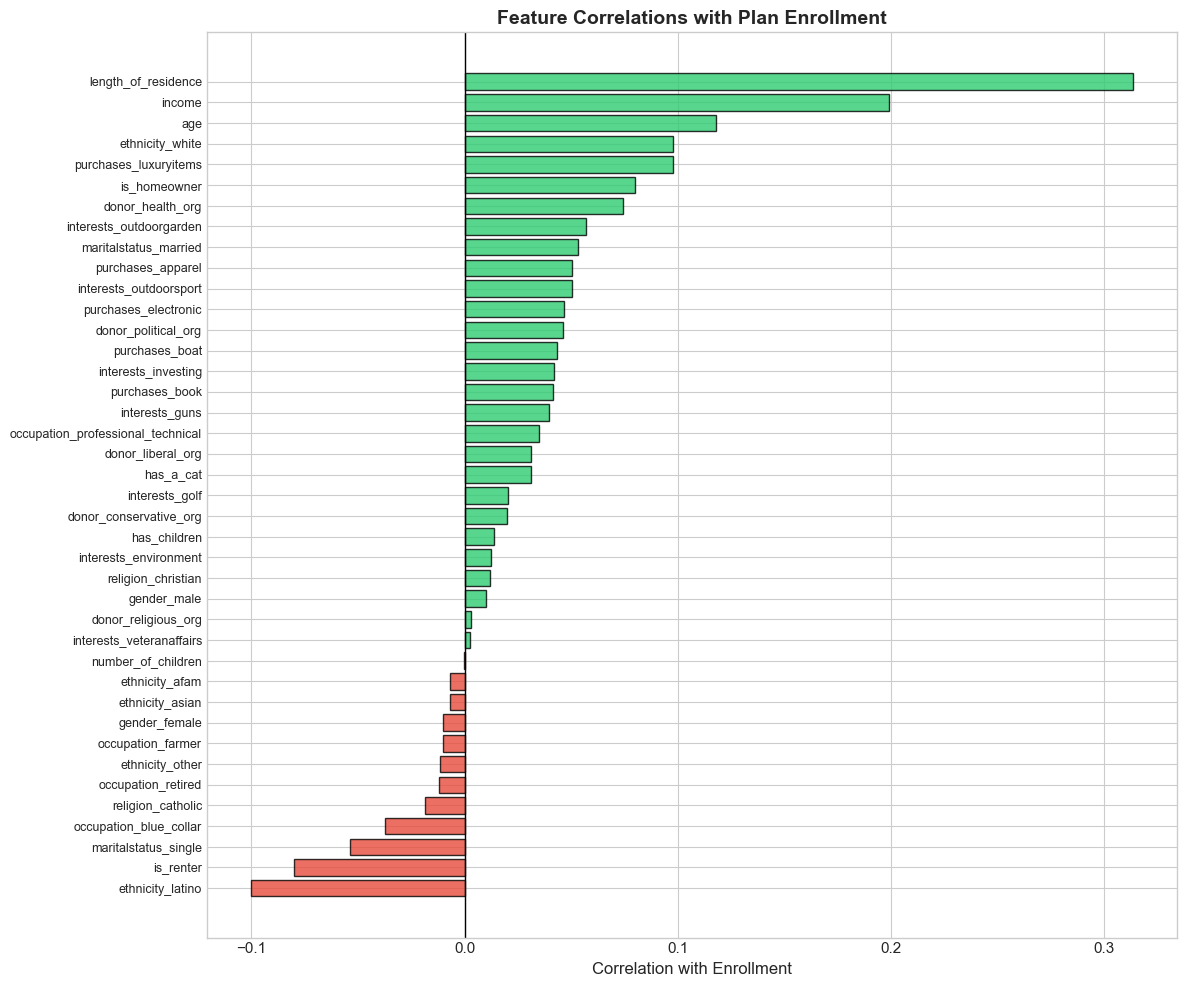


🔑 TOP 5 POSITIVE CORRELATES:
   purchases_luxuryitems: 0.098
   ethnicity_white: 0.098
   age: 0.118
   income: 0.199
   length_of_residence: 0.314

🔻 TOP 5 NEGATIVE CORRELATES:
   ethnicity_latino: -0.100
   is_renter: -0.080
   maritalstatus_single: -0.054
   occupation_blue_collar: -0.038
   religion_catholic: -0.019


In [14]:
# Select numeric features for correlation analysis
numeric_cols = ['age', 'income', 'length_of_residence', 'has_children', 'number_of_children',
                'is_homeowner', 'is_renter', 'gender_female', 'gender_male',
                'maritalstatus_single', 'maritalstatus_married',
                'religion_catholic', 'religion_christian',
                'donor_political_org', 'donor_liberal_org', 'donor_conservative_org', 
                'donor_religious_org', 'donor_health_org',
                'occupation_blue_collar', 'occupation_farmer', 'occupation_professional_technical', 'occupation_retired',
                'purchases_apparel', 'purchases_book', 'purchases_electronic', 'purchases_boat', 'purchases_luxuryitems',
                'has_a_cat', 'interests_environment', 'interests_outdoorgarden', 'interests_outdoorsport',
                'interests_guns', 'interests_golf', 'interests_investing', 'interests_veteranaffairs',
                'ethnicity_afam', 'ethnicity_latino', 'ethnicity_asian', 'ethnicity_white', 'ethnicity_other',
                'is_enrolled']

# Calculate correlations with enrollment and plot
correlations = train_df[numeric_cols].corr()['is_enrolled'].drop('is_enrolled').sort_values()
fig, ax = plt.subplots(figsize=(12, 10))

colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in correlations]
ax.barh(range(len(correlations)), correlations.values, color=colors, edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(correlations)))
ax.set_yticklabels(correlations.index, fontsize=9)
ax.axvline(x=0, color='black', linewidth=1)
ax.set_xlabel('Correlation with Enrollment', fontsize=12)
ax.set_title('Feature Correlations with Plan Enrollment', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()